In [2]:
import pandas as pd
import missingno as msno
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb

In [3]:
df = pd.read_csv('final/train_final.csv')

In [4]:
df.head()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,...,discrete_sub_grade_28_one_hot,discrete_sub_grade_29_one_hot,discrete_sub_grade_30_one_hot,discrete_sub_grade_31_one_hot,discrete_sub_grade_32_one_hot,discrete_sub_grade_33_one_hot,discrete_sub_grade_34_one_hot,discrete_sub_grade_35_one_hot,discrete_term_1_one_hot,discrete_term_2_one_hot
0,55000.0,NaN,0.0,5.91,NaN,679.0,675.0,3600.0,3600.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,65000.0,NaN,1.0,16.06,NaN,719.0,715.0,24700.0,24700.0,4.0,...,0,0,0,0,0,0,0,0,1,0
2,63000.0,71000.0,0.0,10.78,13.85,699.0,695.0,20000.0,20000.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,104433.0,NaN,1.0,25.37,NaN,699.0,695.0,10400.0,10400.0,3.0,...,0,0,0,0,0,0,0,0,0,1
4,34000.0,NaN,0.0,10.20,NaN,694.0,690.0,11950.0,11950.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.columns.to_list()

['continuous_annual_inc',
 'continuous_annual_inc_joint',
 'continuous_delinq_2yrs',
 'continuous_dti',
 'continuous_dti_joint',
 'continuous_fico_range_high',
 'continuous_fico_range_low',
 'continuous_funded_amnt',
 'continuous_funded_amnt_inv',
 'continuous_inq_last_6mths',
 'continuous_installment',
 'continuous_int_rate',
 'continuous_last_fico_range_high',
 'continuous_last_fico_range_low',
 'continuous_loan_amnt',
 'loan_status',
 'continuous_mths_since_last_delinq',
 'continuous_mths_since_last_major_derog',
 'continuous_mths_since_last_record',
 'continuous_open_acc',
 'continuous_pub_rec',
 'discrete_addr_state_1_one_hot',
 'discrete_addr_state_2_one_hot',
 'discrete_addr_state_3_one_hot',
 'discrete_addr_state_4_one_hot',
 'discrete_addr_state_5_one_hot',
 'discrete_addr_state_6_one_hot',
 'discrete_addr_state_7_one_hot',
 'discrete_addr_state_8_one_hot',
 'discrete_addr_state_9_one_hot',
 'discrete_addr_state_10_one_hot',
 'discrete_addr_state_11_one_hot',
 'discrete_addr_s

<AxesSubplot:>

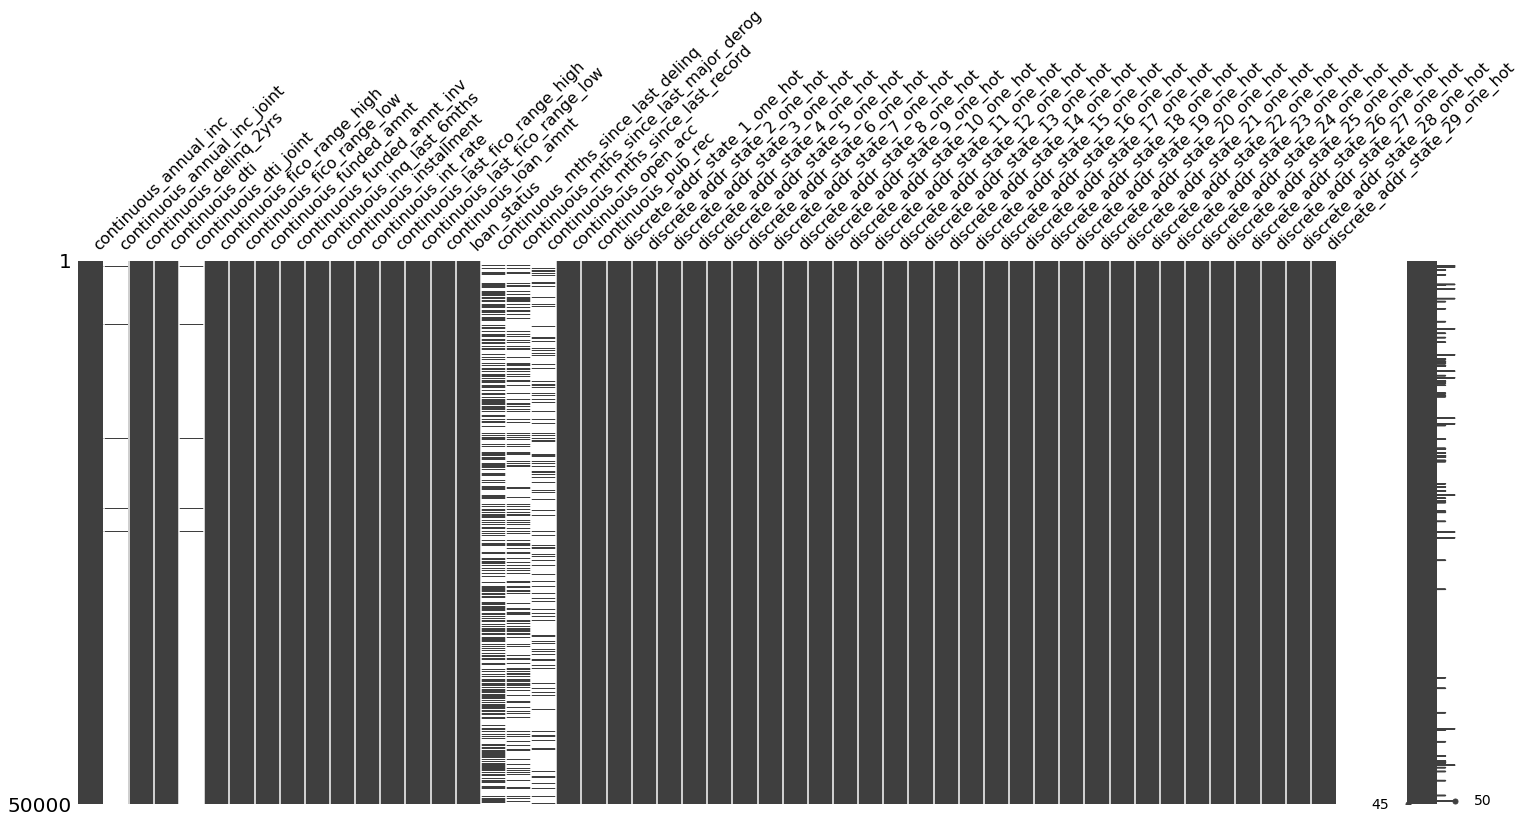

In [6]:
msno.matrix(df[df.columns[0:50]])

In [23]:
df.describe()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,...,discrete_sub_grade_28_one_hot,discrete_sub_grade_29_one_hot,discrete_sub_grade_30_one_hot,discrete_sub_grade_31_one_hot,discrete_sub_grade_32_one_hot,discrete_sub_grade_33_one_hot,discrete_sub_grade_34_one_hot,discrete_sub_grade_35_one_hot,discrete_term_1_one_hot,discrete_term_2_one_hot
count,5.000000e+04,220.000000,50000.00000,49999.000000,220.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,7.835886e+04,109248.802545,0.34738,19.080239,18.831864,698.404460,694.404300,14332.53650,14325.533000,0.620820,...,0.008180,0.028180,0.001420,0.001260,0.000880,0.000520,0.002400,0.000280,0.773740,0.226260
std,9.783053e+04,52319.230212,0.91874,9.802002,7.586033,31.180915,31.180139,8617.58487,8612.853833,0.906035,...,0.090074,0.165488,0.037656,0.035474,0.029652,0.022798,0.048931,0.016731,0.418414,0.418414
min,0.000000e+00,28000.000000,0.00000,0.000000,3.000000,664.000000,660.000000,1000.00000,950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+04,76000.000000,0.00000,12.410000,13.805000,674.000000,670.000000,7775.00000,7750.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.500000e+04,99000.000000,0.00000,18.520000,17.940000,689.000000,685.000000,12000.00000,12000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.400000e+04,132700.000000,0.00000,25.320000,23.477500,714.000000,710.000000,20000.00000,20000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.000000e+06,500000.000000,15.00000,999.000000,43.860000,850.000000,845.000000,35000.00000,35000.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df['loan_status'].value_counts()

1    39788
0    10212
Name: loan_status, dtype: int64

In [13]:
df[['continuous_annual_inc', 'loan_status']].groupby('loan_status', as_index=False).agg(['median','mean','sum'])

continuous_annual_inc                            
                           median          mean           sum
loan_status                                                  
0                         62000.0  71983.453721  7.350950e+08
1                         66500.0  79995.170718  3.182848e+09

In [14]:
df[['continuous_dti', 'loan_status']].groupby('loan_status', as_index=False).agg(['median','mean','sum'])

continuous_dti                      
                    median       mean        sum
loan_status                                     
0                    21.09  21.145656  215939.44
1                    17.90  18.550116  738053.45

/opt/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='continuous_fico_range_low'>

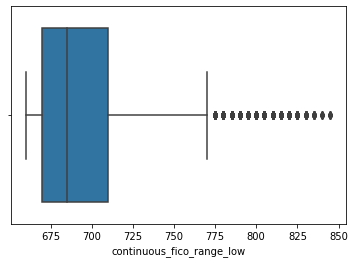

In [23]:
sns.boxplot(df['continuous_fico_range_low']) 

## data

In [3]:
train = pd.read_csv('final/train_final.csv')
test = pd.read_csv('final/test_final.csv')

In [4]:
train_dataset = lgb.Dataset(train.drop(columns='loan_status'), train['loan_status'])
test_dataset = lgb.Dataset(test.drop(columns='loan_status'), test['loan_status'])

## 预估参数范围

In [29]:
param = {'num_leaves': 31, 'learning_rate': 0.1,'objective': 'binary', 'metric':'binary_error'}
num_round = 1000

In [30]:
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

[LightGBM] [Info] Number of positive: 39788, number of negative: 10212
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.795760 -> initscore=1.360002
[LightGBM] [Info] Start training from score 1.360002
[1]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[2]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[3]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[4]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[5]	training's binary_error: 0.14838	valid_1's binary_error: 0.14168
[6]	training's binary_error: 0.11022	valid_1's binary_error: 0.10918
[7]	training's binary_erro

[111]	training's binary_error: 0.06638	valid_1's binary_error: 0.083
[112]	training's binary_error: 0.0663	valid_1's binary_error: 0.083
[113]	training's binary_error: 0.06622	valid_1's binary_error: 0.08308
[114]	training's binary_error: 0.06602	valid_1's binary_error: 0.08296
[115]	training's binary_error: 0.06594	valid_1's binary_error: 0.08298
[116]	training's binary_error: 0.06582	valid_1's binary_error: 0.08302
[117]	training's binary_error: 0.06564	valid_1's binary_error: 0.08298
[118]	training's binary_error: 0.06552	valid_1's binary_error: 0.08292
[119]	training's binary_error: 0.06542	valid_1's binary_error: 0.08288
[120]	training's binary_error: 0.06544	valid_1's binary_error: 0.08292
[121]	training's binary_error: 0.06536	valid_1's binary_error: 0.08304
[122]	training's binary_error: 0.06524	valid_1's binary_error: 0.08292
[123]	training's binary_error: 0.0651	valid_1's binary_error: 0.08288
[124]	training's binary_error: 0.06512	valid_1's binary_error: 0.08286
[125]	traini

[271]	training's binary_error: 0.04918	valid_1's binary_error: 0.08358
[272]	training's binary_error: 0.04898	valid_1's binary_error: 0.08368
[273]	training's binary_error: 0.04884	valid_1's binary_error: 0.08364
[274]	training's binary_error: 0.04882	valid_1's binary_error: 0.08364
[275]	training's binary_error: 0.0487	valid_1's binary_error: 0.0836
[276]	training's binary_error: 0.04858	valid_1's binary_error: 0.08356
[277]	training's binary_error: 0.04852	valid_1's binary_error: 0.0835
[278]	training's binary_error: 0.04832	valid_1's binary_error: 0.0834
[279]	training's binary_error: 0.04828	valid_1's binary_error: 0.08344
[280]	training's binary_error: 0.0482	valid_1's binary_error: 0.08344
[281]	training's binary_error: 0.04812	valid_1's binary_error: 0.08354
[282]	training's binary_error: 0.04808	valid_1's binary_error: 0.08362
[283]	training's binary_error: 0.04772	valid_1's binary_error: 0.0836
[284]	training's binary_error: 0.0476	valid_1's binary_error: 0.08354
[285]	trainin

[408]	training's binary_error: 0.03556	valid_1's binary_error: 0.08374
[409]	training's binary_error: 0.03552	valid_1's binary_error: 0.08364
[410]	training's binary_error: 0.03538	valid_1's binary_error: 0.0837
[411]	training's binary_error: 0.03536	valid_1's binary_error: 0.08374
[412]	training's binary_error: 0.03532	valid_1's binary_error: 0.08368
[413]	training's binary_error: 0.03518	valid_1's binary_error: 0.08374
[414]	training's binary_error: 0.03518	valid_1's binary_error: 0.08374
[415]	training's binary_error: 0.0351	valid_1's binary_error: 0.08378
[416]	training's binary_error: 0.03506	valid_1's binary_error: 0.08382
[417]	training's binary_error: 0.03492	valid_1's binary_error: 0.0838
[418]	training's binary_error: 0.03482	valid_1's binary_error: 0.0838
[419]	training's binary_error: 0.03474	valid_1's binary_error: 0.08372
[420]	training's binary_error: 0.03462	valid_1's binary_error: 0.08376
[421]	training's binary_error: 0.03466	valid_1's binary_error: 0.08372
[422]	trai

[554]	training's binary_error: 0.02452	valid_1's binary_error: 0.0846
[555]	training's binary_error: 0.0245	valid_1's binary_error: 0.08458
[556]	training's binary_error: 0.02444	valid_1's binary_error: 0.08464
[557]	training's binary_error: 0.02438	valid_1's binary_error: 0.08466
[558]	training's binary_error: 0.02436	valid_1's binary_error: 0.08472
[559]	training's binary_error: 0.02426	valid_1's binary_error: 0.08474
[560]	training's binary_error: 0.02414	valid_1's binary_error: 0.08488
[561]	training's binary_error: 0.024	valid_1's binary_error: 0.08486
[562]	training's binary_error: 0.02398	valid_1's binary_error: 0.08486
[563]	training's binary_error: 0.024	valid_1's binary_error: 0.08486
[564]	training's binary_error: 0.02396	valid_1's binary_error: 0.08486
[565]	training's binary_error: 0.02392	valid_1's binary_error: 0.08488
[566]	training's binary_error: 0.02388	valid_1's binary_error: 0.08484
[567]	training's binary_error: 0.02388	valid_1's binary_error: 0.08482
[568]	traini

[680]	training's binary_error: 0.01704	valid_1's binary_error: 0.085
[681]	training's binary_error: 0.01698	valid_1's binary_error: 0.085
[682]	training's binary_error: 0.01694	valid_1's binary_error: 0.085
[683]	training's binary_error: 0.01694	valid_1's binary_error: 0.085
[684]	training's binary_error: 0.01692	valid_1's binary_error: 0.08494
[685]	training's binary_error: 0.01682	valid_1's binary_error: 0.08492
[686]	training's binary_error: 0.01676	valid_1's binary_error: 0.08494
[687]	training's binary_error: 0.0167	valid_1's binary_error: 0.08488
[688]	training's binary_error: 0.0167	valid_1's binary_error: 0.0849
[689]	training's binary_error: 0.01666	valid_1's binary_error: 0.08484
[690]	training's binary_error: 0.01664	valid_1's binary_error: 0.08482
[691]	training's binary_error: 0.01654	valid_1's binary_error: 0.08476
[692]	training's binary_error: 0.01648	valid_1's binary_error: 0.08464
[693]	training's binary_error: 0.01638	valid_1's binary_error: 0.08476
[694]	training's 

[803]	training's binary_error: 0.01164	valid_1's binary_error: 0.0849
[804]	training's binary_error: 0.01162	valid_1's binary_error: 0.08488
[805]	training's binary_error: 0.01162	valid_1's binary_error: 0.08492
[806]	training's binary_error: 0.01164	valid_1's binary_error: 0.0849
[807]	training's binary_error: 0.01156	valid_1's binary_error: 0.08488
[808]	training's binary_error: 0.0115	valid_1's binary_error: 0.08482
[809]	training's binary_error: 0.0115	valid_1's binary_error: 0.08486
[810]	training's binary_error: 0.01148	valid_1's binary_error: 0.08484
[811]	training's binary_error: 0.0114	valid_1's binary_error: 0.08478
[812]	training's binary_error: 0.01136	valid_1's binary_error: 0.08474
[813]	training's binary_error: 0.01136	valid_1's binary_error: 0.08474
[814]	training's binary_error: 0.01136	valid_1's binary_error: 0.0848
[815]	training's binary_error: 0.0113	valid_1's binary_error: 0.08482
[816]	training's binary_error: 0.01128	valid_1's binary_error: 0.08484
[817]	trainin

[966]	training's binary_error: 0.00696	valid_1's binary_error: 0.08494
[967]	training's binary_error: 0.00696	valid_1's binary_error: 0.08498
[968]	training's binary_error: 0.00692	valid_1's binary_error: 0.08498
[969]	training's binary_error: 0.00686	valid_1's binary_error: 0.08508
[970]	training's binary_error: 0.0068	valid_1's binary_error: 0.08508
[971]	training's binary_error: 0.00674	valid_1's binary_error: 0.08524
[972]	training's binary_error: 0.00674	valid_1's binary_error: 0.08528
[973]	training's binary_error: 0.00674	valid_1's binary_error: 0.08532
[974]	training's binary_error: 0.0067	valid_1's binary_error: 0.0853
[975]	training's binary_error: 0.00662	valid_1's binary_error: 0.08524
[976]	training's binary_error: 0.00662	valid_1's binary_error: 0.08528
[977]	training's binary_error: 0.00656	valid_1's binary_error: 0.08538
[978]	training's binary_error: 0.00654	valid_1's binary_error: 0.08532
[979]	training's binary_error: 0.00656	valid_1's binary_error: 0.08532
[980]	tra

In [31]:
param = {'num_leaves': 31, 'learning_rate': 0.01,'objective': 'binary', 'metric':'binary_error'}
num_round = 1000
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

[LightGBM] [Info] Number of positive: 39788, number of negative: 10212
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.795760 -> initscore=1.360002
[LightGBM] [Info] Start training from score 1.360002
[1]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[2]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[3]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[4]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[5]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[6]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[7]	training's binary_erro

[137]	training's binary_error: 0.07954	valid_1's binary_error: 0.0841
[138]	training's binary_error: 0.0795	valid_1's binary_error: 0.08406
[139]	training's binary_error: 0.07912	valid_1's binary_error: 0.08412
[140]	training's binary_error: 0.07922	valid_1's binary_error: 0.08406
[141]	training's binary_error: 0.079	valid_1's binary_error: 0.08396
[142]	training's binary_error: 0.07886	valid_1's binary_error: 0.08386
[143]	training's binary_error: 0.07876	valid_1's binary_error: 0.08392
[144]	training's binary_error: 0.07878	valid_1's binary_error: 0.08388
[145]	training's binary_error: 0.07858	valid_1's binary_error: 0.08392
[146]	training's binary_error: 0.07838	valid_1's binary_error: 0.08394
[147]	training's binary_error: 0.07834	valid_1's binary_error: 0.08396
[148]	training's binary_error: 0.0783	valid_1's binary_error: 0.08394
[149]	training's binary_error: 0.07824	valid_1's binary_error: 0.08382
[150]	training's binary_error: 0.07832	valid_1's binary_error: 0.0839
[151]	traini

[287]	training's binary_error: 0.07444	valid_1's binary_error: 0.08266
[288]	training's binary_error: 0.07446	valid_1's binary_error: 0.08266
[289]	training's binary_error: 0.07436	valid_1's binary_error: 0.08272
[290]	training's binary_error: 0.07436	valid_1's binary_error: 0.08274
[291]	training's binary_error: 0.07442	valid_1's binary_error: 0.08276
[292]	training's binary_error: 0.07436	valid_1's binary_error: 0.08278
[293]	training's binary_error: 0.07436	valid_1's binary_error: 0.08276
[294]	training's binary_error: 0.07432	valid_1's binary_error: 0.08276
[295]	training's binary_error: 0.07428	valid_1's binary_error: 0.08276
[296]	training's binary_error: 0.07426	valid_1's binary_error: 0.08276
[297]	training's binary_error: 0.0743	valid_1's binary_error: 0.08276
[298]	training's binary_error: 0.0743	valid_1's binary_error: 0.08276
[299]	training's binary_error: 0.07434	valid_1's binary_error: 0.08276
[300]	training's binary_error: 0.07432	valid_1's binary_error: 0.08274
[301]	tr

[430]	training's binary_error: 0.07332	valid_1's binary_error: 0.08276
[431]	training's binary_error: 0.0732	valid_1's binary_error: 0.0828
[432]	training's binary_error: 0.0732	valid_1's binary_error: 0.0828
[433]	training's binary_error: 0.07318	valid_1's binary_error: 0.0828
[434]	training's binary_error: 0.07318	valid_1's binary_error: 0.08278
[435]	training's binary_error: 0.07316	valid_1's binary_error: 0.08274
[436]	training's binary_error: 0.07314	valid_1's binary_error: 0.08274
[437]	training's binary_error: 0.07312	valid_1's binary_error: 0.08274
[438]	training's binary_error: 0.07316	valid_1's binary_error: 0.08274
[439]	training's binary_error: 0.07314	valid_1's binary_error: 0.08274
[440]	training's binary_error: 0.07314	valid_1's binary_error: 0.08272
[441]	training's binary_error: 0.07312	valid_1's binary_error: 0.08268
[442]	training's binary_error: 0.0731	valid_1's binary_error: 0.08268
[443]	training's binary_error: 0.07306	valid_1's binary_error: 0.0827
[444]	trainin

[567]	training's binary_error: 0.07208	valid_1's binary_error: 0.08264
[568]	training's binary_error: 0.07204	valid_1's binary_error: 0.08266
[569]	training's binary_error: 0.07208	valid_1's binary_error: 0.08264
[570]	training's binary_error: 0.07202	valid_1's binary_error: 0.08266
[571]	training's binary_error: 0.072	valid_1's binary_error: 0.08264
[572]	training's binary_error: 0.07198	valid_1's binary_error: 0.08264
[573]	training's binary_error: 0.07196	valid_1's binary_error: 0.08264
[574]	training's binary_error: 0.07192	valid_1's binary_error: 0.08264
[575]	training's binary_error: 0.07192	valid_1's binary_error: 0.08268
[576]	training's binary_error: 0.07192	valid_1's binary_error: 0.0827
[577]	training's binary_error: 0.07196	valid_1's binary_error: 0.0827
[578]	training's binary_error: 0.07192	valid_1's binary_error: 0.08264
[579]	training's binary_error: 0.07192	valid_1's binary_error: 0.08266
[580]	training's binary_error: 0.07192	valid_1's binary_error: 0.08264
[581]	trai

[684]	training's binary_error: 0.07092	valid_1's binary_error: 0.0824
[685]	training's binary_error: 0.07094	valid_1's binary_error: 0.0824
[686]	training's binary_error: 0.07092	valid_1's binary_error: 0.0824
[687]	training's binary_error: 0.07092	valid_1's binary_error: 0.08238
[688]	training's binary_error: 0.07092	valid_1's binary_error: 0.08238
[689]	training's binary_error: 0.07092	valid_1's binary_error: 0.08238
[690]	training's binary_error: 0.07092	valid_1's binary_error: 0.08234
[691]	training's binary_error: 0.07092	valid_1's binary_error: 0.0824
[692]	training's binary_error: 0.07092	valid_1's binary_error: 0.0824
[693]	training's binary_error: 0.07092	valid_1's binary_error: 0.0824
[694]	training's binary_error: 0.07088	valid_1's binary_error: 0.08238
[695]	training's binary_error: 0.07086	valid_1's binary_error: 0.08242
[696]	training's binary_error: 0.07084	valid_1's binary_error: 0.08238
[697]	training's binary_error: 0.07082	valid_1's binary_error: 0.08232
[698]	traini

[828]	training's binary_error: 0.0693	valid_1's binary_error: 0.08248
[829]	training's binary_error: 0.06932	valid_1's binary_error: 0.08248
[830]	training's binary_error: 0.06928	valid_1's binary_error: 0.0825
[831]	training's binary_error: 0.06928	valid_1's binary_error: 0.08246
[832]	training's binary_error: 0.06926	valid_1's binary_error: 0.08246
[833]	training's binary_error: 0.06926	valid_1's binary_error: 0.08246
[834]	training's binary_error: 0.06926	valid_1's binary_error: 0.08244
[835]	training's binary_error: 0.0692	valid_1's binary_error: 0.08242
[836]	training's binary_error: 0.06922	valid_1's binary_error: 0.08242
[837]	training's binary_error: 0.06916	valid_1's binary_error: 0.08238
[838]	training's binary_error: 0.06912	valid_1's binary_error: 0.0824
[839]	training's binary_error: 0.06912	valid_1's binary_error: 0.0824
[840]	training's binary_error: 0.0691	valid_1's binary_error: 0.08238
[841]	training's binary_error: 0.0691	valid_1's binary_error: 0.08238
[842]	trainin

[954]	training's binary_error: 0.06776	valid_1's binary_error: 0.08242
[955]	training's binary_error: 0.06774	valid_1's binary_error: 0.08246
[956]	training's binary_error: 0.0677	valid_1's binary_error: 0.08246
[957]	training's binary_error: 0.06774	valid_1's binary_error: 0.08244
[958]	training's binary_error: 0.06774	valid_1's binary_error: 0.08246
[959]	training's binary_error: 0.06776	valid_1's binary_error: 0.0825
[960]	training's binary_error: 0.06774	valid_1's binary_error: 0.0825
[961]	training's binary_error: 0.06772	valid_1's binary_error: 0.08254
[962]	training's binary_error: 0.0677	valid_1's binary_error: 0.08254
[963]	training's binary_error: 0.06774	valid_1's binary_error: 0.08254
[964]	training's binary_error: 0.0677	valid_1's binary_error: 0.08258
[965]	training's binary_error: 0.06766	valid_1's binary_error: 0.08252
[966]	training's binary_error: 0.06766	valid_1's binary_error: 0.08254
[967]	training's binary_error: 0.06766	valid_1's binary_error: 0.08252
[968]	train

In [32]:
param = {'num_leaves': 64, 'learning_rate': 0.01,'objective': 'binary', 'metric':'binary_error'}
num_round = 1000
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

[LightGBM] [Info] Number of positive: 39788, number of negative: 10212
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.795760 -> initscore=1.360002
[LightGBM] [Info] Start training from score 1.360002
[1]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[2]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[3]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[4]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[5]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[6]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[7]	training's binary_erro

[116]	training's binary_error: 0.0769	valid_1's binary_error: 0.08598
[117]	training's binary_error: 0.07686	valid_1's binary_error: 0.0858
[118]	training's binary_error: 0.0767	valid_1's binary_error: 0.08566
[119]	training's binary_error: 0.0764	valid_1's binary_error: 0.08552
[120]	training's binary_error: 0.07628	valid_1's binary_error: 0.08528
[121]	training's binary_error: 0.0761	valid_1's binary_error: 0.08538
[122]	training's binary_error: 0.07598	valid_1's binary_error: 0.08534
[123]	training's binary_error: 0.07586	valid_1's binary_error: 0.08524
[124]	training's binary_error: 0.0756	valid_1's binary_error: 0.08516
[125]	training's binary_error: 0.0754	valid_1's binary_error: 0.0851
[126]	training's binary_error: 0.07536	valid_1's binary_error: 0.08522
[127]	training's binary_error: 0.07508	valid_1's binary_error: 0.0851
[128]	training's binary_error: 0.07482	valid_1's binary_error: 0.0849
[129]	training's binary_error: 0.0745	valid_1's binary_error: 0.08484
[130]	training's 

[233]	training's binary_error: 0.06982	valid_1's binary_error: 0.08296
[234]	training's binary_error: 0.06978	valid_1's binary_error: 0.0829
[235]	training's binary_error: 0.0697	valid_1's binary_error: 0.08288
[236]	training's binary_error: 0.06966	valid_1's binary_error: 0.0829
[237]	training's binary_error: 0.06968	valid_1's binary_error: 0.08292
[238]	training's binary_error: 0.06964	valid_1's binary_error: 0.08288
[239]	training's binary_error: 0.06966	valid_1's binary_error: 0.08284
[240]	training's binary_error: 0.06966	valid_1's binary_error: 0.08284
[241]	training's binary_error: 0.0696	valid_1's binary_error: 0.08284
[242]	training's binary_error: 0.0697	valid_1's binary_error: 0.08284
[243]	training's binary_error: 0.0697	valid_1's binary_error: 0.08288
[244]	training's binary_error: 0.0697	valid_1's binary_error: 0.0829
[245]	training's binary_error: 0.06966	valid_1's binary_error: 0.08288
[246]	training's binary_error: 0.0696	valid_1's binary_error: 0.08284
[247]	training'

[356]	training's binary_error: 0.06724	valid_1's binary_error: 0.08284
[357]	training's binary_error: 0.06726	valid_1's binary_error: 0.08288
[358]	training's binary_error: 0.0672	valid_1's binary_error: 0.08292
[359]	training's binary_error: 0.0672	valid_1's binary_error: 0.0829
[360]	training's binary_error: 0.06714	valid_1's binary_error: 0.08292
[361]	training's binary_error: 0.06712	valid_1's binary_error: 0.08296
[362]	training's binary_error: 0.0671	valid_1's binary_error: 0.0829
[363]	training's binary_error: 0.06706	valid_1's binary_error: 0.08292
[364]	training's binary_error: 0.06712	valid_1's binary_error: 0.0829
[365]	training's binary_error: 0.0671	valid_1's binary_error: 0.08282
[366]	training's binary_error: 0.06712	valid_1's binary_error: 0.08286
[367]	training's binary_error: 0.0671	valid_1's binary_error: 0.08288
[368]	training's binary_error: 0.06706	valid_1's binary_error: 0.08286
[369]	training's binary_error: 0.06712	valid_1's binary_error: 0.08282
[370]	training

[492]	training's binary_error: 0.06504	valid_1's binary_error: 0.08266
[493]	training's binary_error: 0.06506	valid_1's binary_error: 0.08266
[494]	training's binary_error: 0.06506	valid_1's binary_error: 0.08268
[495]	training's binary_error: 0.06504	valid_1's binary_error: 0.08266
[496]	training's binary_error: 0.06504	valid_1's binary_error: 0.08264
[497]	training's binary_error: 0.06506	valid_1's binary_error: 0.0826
[498]	training's binary_error: 0.06508	valid_1's binary_error: 0.08262
[499]	training's binary_error: 0.06506	valid_1's binary_error: 0.08262
[500]	training's binary_error: 0.065	valid_1's binary_error: 0.08254
[501]	training's binary_error: 0.065	valid_1's binary_error: 0.08252
[502]	training's binary_error: 0.06498	valid_1's binary_error: 0.08252
[503]	training's binary_error: 0.06498	valid_1's binary_error: 0.08254
[504]	training's binary_error: 0.065	valid_1's binary_error: 0.08246
[505]	training's binary_error: 0.06502	valid_1's binary_error: 0.08246
[506]	trainin

[612]	training's binary_error: 0.06324	valid_1's binary_error: 0.08228
[613]	training's binary_error: 0.0632	valid_1's binary_error: 0.0823
[614]	training's binary_error: 0.06318	valid_1's binary_error: 0.08232
[615]	training's binary_error: 0.06318	valid_1's binary_error: 0.08232
[616]	training's binary_error: 0.0631	valid_1's binary_error: 0.08232
[617]	training's binary_error: 0.06308	valid_1's binary_error: 0.08238
[618]	training's binary_error: 0.06308	valid_1's binary_error: 0.08236
[619]	training's binary_error: 0.06304	valid_1's binary_error: 0.08234
[620]	training's binary_error: 0.06306	valid_1's binary_error: 0.08234
[621]	training's binary_error: 0.06294	valid_1's binary_error: 0.0824
[622]	training's binary_error: 0.06294	valid_1's binary_error: 0.0824
[623]	training's binary_error: 0.06296	valid_1's binary_error: 0.08242
[624]	training's binary_error: 0.06296	valid_1's binary_error: 0.08242
[625]	training's binary_error: 0.06286	valid_1's binary_error: 0.08242
[626]	train

[728]	training's binary_error: 0.0607	valid_1's binary_error: 0.0824
[729]	training's binary_error: 0.06068	valid_1's binary_error: 0.0824
[730]	training's binary_error: 0.06056	valid_1's binary_error: 0.0824
[731]	training's binary_error: 0.06054	valid_1's binary_error: 0.08238
[732]	training's binary_error: 0.06052	valid_1's binary_error: 0.08246
[733]	training's binary_error: 0.06046	valid_1's binary_error: 0.0824
[734]	training's binary_error: 0.06046	valid_1's binary_error: 0.0824
[735]	training's binary_error: 0.06046	valid_1's binary_error: 0.08246
[736]	training's binary_error: 0.06044	valid_1's binary_error: 0.08248
[737]	training's binary_error: 0.06046	valid_1's binary_error: 0.08244
[738]	training's binary_error: 0.06038	valid_1's binary_error: 0.08246
[739]	training's binary_error: 0.06038	valid_1's binary_error: 0.0825
[740]	training's binary_error: 0.06038	valid_1's binary_error: 0.08248
[741]	training's binary_error: 0.06036	valid_1's binary_error: 0.08248
[742]	trainin

[846]	training's binary_error: 0.05776	valid_1's binary_error: 0.0827
[847]	training's binary_error: 0.05772	valid_1's binary_error: 0.08262
[848]	training's binary_error: 0.05774	valid_1's binary_error: 0.08266
[849]	training's binary_error: 0.0577	valid_1's binary_error: 0.08266
[850]	training's binary_error: 0.05768	valid_1's binary_error: 0.08264
[851]	training's binary_error: 0.05764	valid_1's binary_error: 0.08262
[852]	training's binary_error: 0.05764	valid_1's binary_error: 0.08254
[853]	training's binary_error: 0.05764	valid_1's binary_error: 0.0826
[854]	training's binary_error: 0.0576	valid_1's binary_error: 0.08258
[855]	training's binary_error: 0.0576	valid_1's binary_error: 0.0826
[856]	training's binary_error: 0.0576	valid_1's binary_error: 0.08262
[857]	training's binary_error: 0.0576	valid_1's binary_error: 0.08258
[858]	training's binary_error: 0.05756	valid_1's binary_error: 0.08256
[859]	training's binary_error: 0.05756	valid_1's binary_error: 0.0826
[860]	training'

[994]	training's binary_error: 0.05416	valid_1's binary_error: 0.08272
[995]	training's binary_error: 0.05414	valid_1's binary_error: 0.08274
[996]	training's binary_error: 0.05414	valid_1's binary_error: 0.08274
[997]	training's binary_error: 0.05414	valid_1's binary_error: 0.08276
[998]	training's binary_error: 0.05412	valid_1's binary_error: 0.08274
[999]	training's binary_error: 0.05406	valid_1's binary_error: 0.0827
[1000]	training's binary_error: 0.05406	valid_1's binary_error: 0.08268


In [37]:
param = {'num_leaves': 80, 'learning_rate': 0.01,'objective': 'binary', 'metric':'binary_error'}
num_round = 1000
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

[LightGBM] [Info] Number of positive: 39788, number of negative: 10212
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.795760 -> initscore=1.360002
[LightGBM] [Info] Start training from score 1.360002
[1]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[2]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[3]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[4]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[5]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[6]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[7]	training's binary_erro

[116]	training's binary_error: 0.07508	valid_1's binary_error: 0.08634
[117]	training's binary_error: 0.07494	valid_1's binary_error: 0.08638
[118]	training's binary_error: 0.07476	valid_1's binary_error: 0.0864
[119]	training's binary_error: 0.07464	valid_1's binary_error: 0.0862
[120]	training's binary_error: 0.07448	valid_1's binary_error: 0.0859
[121]	training's binary_error: 0.07426	valid_1's binary_error: 0.08572
[122]	training's binary_error: 0.07408	valid_1's binary_error: 0.0855
[123]	training's binary_error: 0.074	valid_1's binary_error: 0.08542
[124]	training's binary_error: 0.07362	valid_1's binary_error: 0.08536
[125]	training's binary_error: 0.07338	valid_1's binary_error: 0.08518
[126]	training's binary_error: 0.07316	valid_1's binary_error: 0.0852
[127]	training's binary_error: 0.07306	valid_1's binary_error: 0.08526
[128]	training's binary_error: 0.07286	valid_1's binary_error: 0.085
[129]	training's binary_error: 0.07262	valid_1's binary_error: 0.08502
[130]	training'

[235]	training's binary_error: 0.06742	valid_1's binary_error: 0.08292
[236]	training's binary_error: 0.06748	valid_1's binary_error: 0.08292
[237]	training's binary_error: 0.06746	valid_1's binary_error: 0.08288
[238]	training's binary_error: 0.06736	valid_1's binary_error: 0.08292
[239]	training's binary_error: 0.06724	valid_1's binary_error: 0.08288
[240]	training's binary_error: 0.06734	valid_1's binary_error: 0.08286
[241]	training's binary_error: 0.06728	valid_1's binary_error: 0.0828
[242]	training's binary_error: 0.06726	valid_1's binary_error: 0.08282
[243]	training's binary_error: 0.06728	valid_1's binary_error: 0.08282
[244]	training's binary_error: 0.06724	valid_1's binary_error: 0.08276
[245]	training's binary_error: 0.06728	valid_1's binary_error: 0.0828
[246]	training's binary_error: 0.06724	valid_1's binary_error: 0.08278
[247]	training's binary_error: 0.06714	valid_1's binary_error: 0.08276
[248]	training's binary_error: 0.06712	valid_1's binary_error: 0.08282
[249]	tr

[364]	training's binary_error: 0.06448	valid_1's binary_error: 0.08258
[365]	training's binary_error: 0.0645	valid_1's binary_error: 0.08262
[366]	training's binary_error: 0.0645	valid_1's binary_error: 0.08264
[367]	training's binary_error: 0.0645	valid_1's binary_error: 0.08262
[368]	training's binary_error: 0.06454	valid_1's binary_error: 0.08262
[369]	training's binary_error: 0.06454	valid_1's binary_error: 0.08256
[370]	training's binary_error: 0.06452	valid_1's binary_error: 0.08254
[371]	training's binary_error: 0.06448	valid_1's binary_error: 0.08252
[372]	training's binary_error: 0.06442	valid_1's binary_error: 0.08254
[373]	training's binary_error: 0.06444	valid_1's binary_error: 0.08254
[374]	training's binary_error: 0.06446	valid_1's binary_error: 0.08252
[375]	training's binary_error: 0.06446	valid_1's binary_error: 0.08254
[376]	training's binary_error: 0.06446	valid_1's binary_error: 0.08252
[377]	training's binary_error: 0.06446	valid_1's binary_error: 0.08248
[378]	tra

[485]	training's binary_error: 0.06186	valid_1's binary_error: 0.08246
[486]	training's binary_error: 0.06188	valid_1's binary_error: 0.08246
[487]	training's binary_error: 0.06182	valid_1's binary_error: 0.08244
[488]	training's binary_error: 0.06178	valid_1's binary_error: 0.08244
[489]	training's binary_error: 0.06178	valid_1's binary_error: 0.08242
[490]	training's binary_error: 0.0617	valid_1's binary_error: 0.08244
[491]	training's binary_error: 0.0617	valid_1's binary_error: 0.08242
[492]	training's binary_error: 0.06164	valid_1's binary_error: 0.08246
[493]	training's binary_error: 0.06164	valid_1's binary_error: 0.08246
[494]	training's binary_error: 0.06168	valid_1's binary_error: 0.08246
[495]	training's binary_error: 0.06166	valid_1's binary_error: 0.08246
[496]	training's binary_error: 0.06166	valid_1's binary_error: 0.08244
[497]	training's binary_error: 0.06164	valid_1's binary_error: 0.08242
[498]	training's binary_error: 0.06164	valid_1's binary_error: 0.08242
[499]	tr

[615]	training's binary_error: 0.05934	valid_1's binary_error: 0.0823
[616]	training's binary_error: 0.05928	valid_1's binary_error: 0.08238
[617]	training's binary_error: 0.05928	valid_1's binary_error: 0.0824
[618]	training's binary_error: 0.05926	valid_1's binary_error: 0.08234
[619]	training's binary_error: 0.05926	valid_1's binary_error: 0.08234
[620]	training's binary_error: 0.05924	valid_1's binary_error: 0.08236
[621]	training's binary_error: 0.05924	valid_1's binary_error: 0.08238
[622]	training's binary_error: 0.05922	valid_1's binary_error: 0.08238
[623]	training's binary_error: 0.05926	valid_1's binary_error: 0.08236
[624]	training's binary_error: 0.05926	valid_1's binary_error: 0.08236
[625]	training's binary_error: 0.05926	valid_1's binary_error: 0.08234
[626]	training's binary_error: 0.05926	valid_1's binary_error: 0.08236
[627]	training's binary_error: 0.05924	valid_1's binary_error: 0.08238
[628]	training's binary_error: 0.05922	valid_1's binary_error: 0.08236
[629]	tr

[734]	training's binary_error: 0.05636	valid_1's binary_error: 0.08244
[735]	training's binary_error: 0.0563	valid_1's binary_error: 0.08238
[736]	training's binary_error: 0.0563	valid_1's binary_error: 0.08238
[737]	training's binary_error: 0.05626	valid_1's binary_error: 0.08234
[738]	training's binary_error: 0.0562	valid_1's binary_error: 0.08238
[739]	training's binary_error: 0.05616	valid_1's binary_error: 0.08238
[740]	training's binary_error: 0.05612	valid_1's binary_error: 0.08238
[741]	training's binary_error: 0.0561	valid_1's binary_error: 0.08232
[742]	training's binary_error: 0.05608	valid_1's binary_error: 0.0823
[743]	training's binary_error: 0.05608	valid_1's binary_error: 0.08236
[744]	training's binary_error: 0.05602	valid_1's binary_error: 0.08238
[745]	training's binary_error: 0.056	valid_1's binary_error: 0.0824
[746]	training's binary_error: 0.05596	valid_1's binary_error: 0.08238
[747]	training's binary_error: 0.05588	valid_1's binary_error: 0.08238
[748]	training

[874]	training's binary_error: 0.05184	valid_1's binary_error: 0.0823
[875]	training's binary_error: 0.05184	valid_1's binary_error: 0.0824
[876]	training's binary_error: 0.0518	valid_1's binary_error: 0.08244
[877]	training's binary_error: 0.05176	valid_1's binary_error: 0.08238
[878]	training's binary_error: 0.05172	valid_1's binary_error: 0.08242
[879]	training's binary_error: 0.05168	valid_1's binary_error: 0.0824
[880]	training's binary_error: 0.05166	valid_1's binary_error: 0.08242
[881]	training's binary_error: 0.05168	valid_1's binary_error: 0.0824
[882]	training's binary_error: 0.05164	valid_1's binary_error: 0.08238
[883]	training's binary_error: 0.05164	valid_1's binary_error: 0.08236
[884]	training's binary_error: 0.05158	valid_1's binary_error: 0.08236
[885]	training's binary_error: 0.05158	valid_1's binary_error: 0.08238
[886]	training's binary_error: 0.05158	valid_1's binary_error: 0.08236
[887]	training's binary_error: 0.0516	valid_1's binary_error: 0.0823
[888]	trainin

In [69]:
param = {'num_leaves': 80, 'learning_rate': 0.01,'objective': 'binary', 'metric':'binary_error'}
num_round = 1000
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

[LightGBM] [Info] Number of positive: 39788, number of negative: 10212
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.795760 -> initscore=1.360002
[LightGBM] [Info] Start training from score 1.360002
[1]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[2]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[3]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[4]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[5]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[6]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[7]	training's binary_erro

[118]	training's binary_error: 0.07476	valid_1's binary_error: 0.0864
[119]	training's binary_error: 0.07464	valid_1's binary_error: 0.0862
[120]	training's binary_error: 0.07448	valid_1's binary_error: 0.0859
[121]	training's binary_error: 0.07426	valid_1's binary_error: 0.08572
[122]	training's binary_error: 0.07408	valid_1's binary_error: 0.0855
[123]	training's binary_error: 0.074	valid_1's binary_error: 0.08542
[124]	training's binary_error: 0.07362	valid_1's binary_error: 0.08536
[125]	training's binary_error: 0.07338	valid_1's binary_error: 0.08518
[126]	training's binary_error: 0.07316	valid_1's binary_error: 0.0852
[127]	training's binary_error: 0.07306	valid_1's binary_error: 0.08526
[128]	training's binary_error: 0.07286	valid_1's binary_error: 0.085
[129]	training's binary_error: 0.07262	valid_1's binary_error: 0.08502
[130]	training's binary_error: 0.07246	valid_1's binary_error: 0.08488
[131]	training's binary_error: 0.07236	valid_1's binary_error: 0.0847
[132]	training's

[243]	training's binary_error: 0.06728	valid_1's binary_error: 0.08282
[244]	training's binary_error: 0.06724	valid_1's binary_error: 0.08276
[245]	training's binary_error: 0.06728	valid_1's binary_error: 0.0828
[246]	training's binary_error: 0.06724	valid_1's binary_error: 0.08278
[247]	training's binary_error: 0.06714	valid_1's binary_error: 0.08276
[248]	training's binary_error: 0.06712	valid_1's binary_error: 0.08282
[249]	training's binary_error: 0.06712	valid_1's binary_error: 0.08284
[250]	training's binary_error: 0.06702	valid_1's binary_error: 0.08272
[251]	training's binary_error: 0.06704	valid_1's binary_error: 0.08274
[252]	training's binary_error: 0.067	valid_1's binary_error: 0.08276
[253]	training's binary_error: 0.06694	valid_1's binary_error: 0.0827
[254]	training's binary_error: 0.06698	valid_1's binary_error: 0.0827
[255]	training's binary_error: 0.06702	valid_1's binary_error: 0.08268
[256]	training's binary_error: 0.06708	valid_1's binary_error: 0.0827
[257]	traini

[376]	training's binary_error: 0.06446	valid_1's binary_error: 0.08252
[377]	training's binary_error: 0.06446	valid_1's binary_error: 0.08248
[378]	training's binary_error: 0.06436	valid_1's binary_error: 0.08248
[379]	training's binary_error: 0.0644	valid_1's binary_error: 0.08244
[380]	training's binary_error: 0.06446	valid_1's binary_error: 0.08244
[381]	training's binary_error: 0.0644	valid_1's binary_error: 0.08246
[382]	training's binary_error: 0.06436	valid_1's binary_error: 0.08248
[383]	training's binary_error: 0.06436	valid_1's binary_error: 0.08248
[384]	training's binary_error: 0.06442	valid_1's binary_error: 0.0825
[385]	training's binary_error: 0.06438	valid_1's binary_error: 0.08252
[386]	training's binary_error: 0.06428	valid_1's binary_error: 0.08254
[387]	training's binary_error: 0.06428	valid_1's binary_error: 0.08256
[388]	training's binary_error: 0.0642	valid_1's binary_error: 0.08256
[389]	training's binary_error: 0.0642	valid_1's binary_error: 0.0826
[390]	traini

[504]	training's binary_error: 0.06162	valid_1's binary_error: 0.0824
[505]	training's binary_error: 0.06162	valid_1's binary_error: 0.0824
[506]	training's binary_error: 0.0616	valid_1's binary_error: 0.0824
[507]	training's binary_error: 0.0616	valid_1's binary_error: 0.0824
[508]	training's binary_error: 0.06166	valid_1's binary_error: 0.08232
[509]	training's binary_error: 0.06168	valid_1's binary_error: 0.08236
[510]	training's binary_error: 0.06164	valid_1's binary_error: 0.08232
[511]	training's binary_error: 0.0617	valid_1's binary_error: 0.08234
[512]	training's binary_error: 0.0617	valid_1's binary_error: 0.08234
[513]	training's binary_error: 0.0617	valid_1's binary_error: 0.08234
[514]	training's binary_error: 0.06164	valid_1's binary_error: 0.08232
[515]	training's binary_error: 0.06158	valid_1's binary_error: 0.0823
[516]	training's binary_error: 0.06158	valid_1's binary_error: 0.08232
[517]	training's binary_error: 0.06156	valid_1's binary_error: 0.0823
[518]	training's 

[637]	training's binary_error: 0.05902	valid_1's binary_error: 0.08254
[638]	training's binary_error: 0.059	valid_1's binary_error: 0.08244
[639]	training's binary_error: 0.05894	valid_1's binary_error: 0.0825
[640]	training's binary_error: 0.05892	valid_1's binary_error: 0.08248
[641]	training's binary_error: 0.05888	valid_1's binary_error: 0.08252
[642]	training's binary_error: 0.05888	valid_1's binary_error: 0.0824
[643]	training's binary_error: 0.05886	valid_1's binary_error: 0.0824
[644]	training's binary_error: 0.05884	valid_1's binary_error: 0.08248
[645]	training's binary_error: 0.05882	valid_1's binary_error: 0.08242
[646]	training's binary_error: 0.05872	valid_1's binary_error: 0.08244
[647]	training's binary_error: 0.05872	valid_1's binary_error: 0.08244
[648]	training's binary_error: 0.05866	valid_1's binary_error: 0.08248
[649]	training's binary_error: 0.05864	valid_1's binary_error: 0.0825
[650]	training's binary_error: 0.05862	valid_1's binary_error: 0.08252
[651]	traini

[777]	training's binary_error: 0.0552	valid_1's binary_error: 0.08244
[778]	training's binary_error: 0.05518	valid_1's binary_error: 0.08246
[779]	training's binary_error: 0.05512	valid_1's binary_error: 0.0824
[780]	training's binary_error: 0.055	valid_1's binary_error: 0.0824
[781]	training's binary_error: 0.05496	valid_1's binary_error: 0.08236
[782]	training's binary_error: 0.05494	valid_1's binary_error: 0.08234
[783]	training's binary_error: 0.0549	valid_1's binary_error: 0.08232
[784]	training's binary_error: 0.05484	valid_1's binary_error: 0.08232
[785]	training's binary_error: 0.05482	valid_1's binary_error: 0.08232
[786]	training's binary_error: 0.0548	valid_1's binary_error: 0.08232
[787]	training's binary_error: 0.0547	valid_1's binary_error: 0.08234
[788]	training's binary_error: 0.0547	valid_1's binary_error: 0.0823
[789]	training's binary_error: 0.05464	valid_1's binary_error: 0.08234
[790]	training's binary_error: 0.05462	valid_1's binary_error: 0.08238
[791]	training's

[919]	training's binary_error: 0.0508	valid_1's binary_error: 0.08252
[920]	training's binary_error: 0.0508	valid_1's binary_error: 0.08248
[921]	training's binary_error: 0.05072	valid_1's binary_error: 0.08258
[922]	training's binary_error: 0.0507	valid_1's binary_error: 0.08258
[923]	training's binary_error: 0.05066	valid_1's binary_error: 0.08262
[924]	training's binary_error: 0.05066	valid_1's binary_error: 0.08258
[925]	training's binary_error: 0.05064	valid_1's binary_error: 0.08256
[926]	training's binary_error: 0.05062	valid_1's binary_error: 0.08258
[927]	training's binary_error: 0.05062	valid_1's binary_error: 0.08264
[928]	training's binary_error: 0.05058	valid_1's binary_error: 0.08262
[929]	training's binary_error: 0.05058	valid_1's binary_error: 0.08264
[930]	training's binary_error: 0.05054	valid_1's binary_error: 0.08268
[931]	training's binary_error: 0.05052	valid_1's binary_error: 0.08268
[932]	training's binary_error: 0.0505	valid_1's binary_error: 0.08268
[933]	trai

In [72]:
len(model.feature_importance())

145

In [85]:
print(pd.DataFrame({
        'column': train_dataset.feature_name,
        'importance': model.feature_importance(),
    }).sort_values(by='importance', ascending=False))

                                     column  importance
3                            continuous_dti        8093
12          continuous_last_fico_range_high        7868
0                     continuous_annual_inc        6281
15        continuous_mths_since_last_delinq        6022
10                   continuous_installment        5730
5                continuous_fico_range_high        4627
18                      continuous_open_acc        4203
11                      continuous_int_rate        3958
16   continuous_mths_since_last_major_derog        3477
7                    continuous_funded_amnt        3256
17        continuous_mths_since_last_record        3119
9                 continuous_inq_last_6mths        1509
8                continuous_funded_amnt_inv        1421
143                 discrete_term_1_one_hot        1378
82           discrete_emp_length_12_one_hot        1220
90        discrete_home_ownership_1_one_hot         697
95               discrete_purpose_1_one_hot     

## 最优参数

In [17]:
import io
import multiprocessing
from contextlib import redirect_stdout
from copy import deepcopy
from dataclasses import dataclass, asdict
import hyperopt.pyll
from hyperopt import fmin, tpe, hp
from hyperopt import space_eval
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

import copy
cpu_count = 4
use_gpu = False
@dataclass
class LGBOpt:
    num_threads: any = hp.choice('num_threads', [cpu_count])
    num_leaves: any = hp.choice('num_leaves', [30,40,50,60,70,80,90,100,110,120,130])
    metric: any = hp.choice('metric', ['binary_error'])
    num_round: any = hp.choice('num_rounds', [1000])
    objective: any = hp.choice('objective', ['binary'])
    learning_rate: any = hp.uniform('learning_rate', 0.01, 0.1)
    feature_fraction: any = hp.uniform('feature_fraction', 0.5, 1.0)
    bagging_fraction: any = hp.uniform('bagging_fraction', 0.8, 1.0)
    device_type: any = hp.choice('device_tpye', ['gpu']) if use_gpu else hp.choice('device_type',
                                                                                   ['cpu'])
    boosting: any = hp.choice('boosting', ['gbdt', 'dart', 'goss'])
    extra_trees: any = hp.choice('extra_tress', [False, True])
    drop_rate: any = hp.uniform('drop_rate', 0, 0.2)
    uniform_drop: any = hp.choice('uniform_drop', [True, False])
    lambda_l1: any = hp.uniform('lambda_l1', 0, 10)  # TODO: Check range
    lambda_l2: any = hp.uniform('lambda_l2', 0, 10)  # TODO: Check range
    min_gain_to_split: any = hp.uniform('min_gain_to_split', 0, 1)  # TODO: Check range
    min_data_in_bin = hp.choice('min_data_in_bin', [3, 5, 10, 15, 20, 50])

    @staticmethod
    def get_common_params():
        return {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
    

In [18]:
class FitterBase(object):
    def __init__(self, label, metric, max_eval=100, opt=None):
        self.label = label
        self.metric = metric
        self.opt_params = dict()
        self.max_eval = max_eval
        self.opt = opt

    def get_loss(self, y, y_pred):
        if self.metric == 'error':
            return 1 - accuracy_score(y, y_pred)
        elif self.metric == 'precision':
            return 1 - precision_score(y, y_pred)
        elif self.metric == 'recall':
            return 1 - recall_score(y, y_pred)
        elif self.metric == 'macro_f1':
            return 1 - f1_score(y, y_pred, average='macro')
        elif self.metric == 'micro_f1':
            return 1 - f1_score(y, y_pred, average='micro')
        elif self.metric == 'auc':  # TODO: Add a warning checking if y_predict is all [0, 1], it should be probability
            return 1 - roc_auc_score(y, y_pred)
        else:
            raise Exception("Not implemented yet.")

In [19]:
class LGBFitter(FitterBase):
    def __init__(self, label='label', metric='error', opt: LGBOpt = None, max_eval=100):
        super(LGBFitter, self).__init__(label, metric, max_eval)
        if opt is not None:
            self.opt = opt
        else:
            self.opt = LGBOpt()
        self.best_round = None
        self.clf = None

    def train(self, train_df, eval_df, params=None, use_best_eval=True):
        self.best_round = None
        dtrain = lgb.Dataset(train_df.drop(columns=[self.label]), train_df[self.label])
        deval = lgb.Dataset(eval_df.drop(columns=[self.label]), eval_df[self.label])
        evallist = [dtrain, deval]
        if params is None:
            use_params = deepcopy(self.opt_params)
        else:
            use_params = deepcopy(params)

        num_round = use_params.pop('num_round')
        if use_best_eval:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            min_error = np.inf
            min_index = 0
            for idx in range(len(output) - 1):
                if len(output[idx].split("\t")) == 3:
                    temp = float(output[idx].split("\t")[2].split(":")[1])
                    if min_error > temp:
                        min_error = temp
                        min_index = int(output[idx].split("\t")[0][1:-1])
            print(": The minimum is attained in round %d" % (min_index + 1))
            self.best_round = min_index + 1
            return output
        else:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            self.best_round = num_round
            return output

    def search(self, train_df, eval_df, use_best_eval=True):
        self.opt_params = dict()

        def train_impl(params):
            self.train(train_df, eval_df, params, use_best_eval)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            return self.get_loss(eval_df[self.label], y_pred)

        self.opt_params = fmin(train_impl, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def search_k_fold(self, k_fold, data, use_best_eval=True):
        self.opt_params = dict()

        def train_impl_nfold(params):
            loss = list()
            for train_id, eval_id in k_fold.split(data):
                train_df = data.loc[train_id]
                eval_df = data.loc[eval_id]
                self.train(train_df, eval_df, params, use_best_eval)
                if self.metric == 'auc':
                    y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
                else:
                    y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                               num_iteration=self.best_round) > 0.5).astype(int)
                loss.append(self.get_loss(eval_df[self.label], y_pred))
            return np.mean(loss)

        self.opt_params = fmin(train_impl_nfold, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def train_k_fold(self, k_fold, train_data, test_data, params=None, drop_test_y=True, use_best_eval=True):
        acc_result = list()
        train_pred = np.empty(train_data.shape[0])
        test_pred = np.empty(test_data.shape[0])
        if drop_test_y:
            dtest = test_data.drop(columns=self.label)
        else:
            dtest = test_data

        models = list()
        for train_id, eval_id in k_fold.split(train_data):
            train_df = train_data.loc[train_id]
            eval_df = train_data.loc[eval_id]
            self.train(train_df, eval_df, params, use_best_eval)
            models.append(copy.deepcopy(self.clf))
            train_pred[eval_id] = self.clf.predict(eval_df.drop(columns=self.label), num_iteration=self.best_round)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            acc_result.append(self.get_loss(eval_df[self.label], y_pred))
            test_pred += self.clf.predict(dtest, num_iteration=self.best_round)
        test_pred /= k_fold.n_splits
        return train_pred, test_pred, acc_result, models

In [20]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [51]:
fitter = LGBFitter(label='loan_status')

fitter.search_k_fold(kfold, train)
para = space_eval(asdict(fitter.opt), fitter.opt_params)

: The minimum is attained in round 267                 
: The minimum is attained in round 196                 
: The minimum is attained in round 147                 
: The minimum is attained in round 966                 
: The minimum is attained in round 250                 
: The minimum is attained in round 44                                   
: The minimum is attained in round 45                                   
: The minimum is attained in round 18                                   
: The minimum is attained in round 216                                  
: The minimum is attained in round 360                                  
: The minimum is attained in round 151                                            
: The minimum is attained in round 131                                            
: The minimum is attained in round 246                                            
: The minimum is attained in round 168                                            
: The minimum is attain

: The minimum is attained in round 108                                    
: The minimum is attained in round 211                                    
: The minimum is attained in round 175                                    
: The minimum is attained in round 89                                     
: The minimum is attained in round 36                                    
: The minimum is attained in round 80                                    
: The minimum is attained in round 159                                   
: The minimum is attained in round 52                                    
: The minimum is attained in round 257                                   
: The minimum is attained in round 117                                   
: The minimum is attained in round 177                                   
: The minimum is attained in round 192                                   
: The minimum is attained in round 290                                   
: The minimum is attained in round

: The minimum is attained in round 193                                   
: The minimum is attained in round 507                                   
: The minimum is attained in round 418                                   
: The minimum is attained in round 145                                   
: The minimum is attained in round 208                                   
: The minimum is attained in round 587                                   
: The minimum is attained in round 159                                   
: The minimum is attained in round 212                                   
: The minimum is attained in round 381                                   
: The minimum is attained in round 590                                   
: The minimum is attained in round 346                                   
: The minimum is attained in round 375                                   
: The minimum is attained in round 451                                   
: The minimum is attained in round 283

In [52]:
fitter = LGBFitter(label='loan_status')
output = fitter.train_k_fold(kfold, train, test, params=para, use_best_eval=True)
test_acc = accuracy_score(test['loan_status'], output[1].round())
print(f'accuracy_score: {test_acc}')

: The minimum is attained in round 301
Finished loading model, total used 1000 iterations
: The minimum is attained in round 521
Finished loading model, total used 1000 iterations
: The minimum is attained in round 243
Finished loading model, total used 1000 iterations
: The minimum is attained in round 649
Finished loading model, total used 1000 iterations
: The minimum is attained in round 729
Finished loading model, total used 1000 iterations
accuracy_score: 0.91854


## new feature

In [89]:
train_new = train.copy(deep=True)
test_new = test.copy(deep=True)

In [91]:
# funded_amnt_rate
train_new['funded_amnt_rate'] = train_new['continuous_funded_amnt']/train_new['continuous_funded_amnt_inv']
test_new['funded_amnt_rate'] = test_new['continuous_funded_amnt']/test_new['continuous_funded_amnt_inv']

In [99]:
train_new['mths_since_rate'] = (train_new['continuous_mths_since_last_record']-train_new['continuous_mths_since_last_major_derog'])/train_new['continuous_mths_since_last_delinq']
test_new['mths_since_rate'] = (test_new['continuous_mths_since_last_record']-test_new['continuous_mths_since_last_major_derog'])/test_new['continuous_mths_since_last_delinq']

In [103]:
fitter_new = LGBFitter(label='loan_status')

fitter_new.search_k_fold(kfold, train_new)
para_new = space_eval(asdict(fitter_new.opt), fitter_new.opt_params)

: The minimum is attained in round 51                  
: The minimum is attained in round 32                  
: The minimum is attained in round 41                  
: The minimum is attained in round 58                  
: The minimum is attained in round 112                 
: The minimum is attained in round 415                               
: The minimum is attained in round 109                               
: The minimum is attained in round 173                               
: The minimum is attained in round 99                                
: The minimum is attained in round 89                                
: The minimum is attained in round 231                                
: The minimum is attained in round 425                                
: The minimum is attained in round 298                                
: The minimum is attained in round 679                                
: The minimum is attained in round 67                                 
: The minimum i

: The minimum is attained in round 618                                 
: The minimum is attained in round 725                                 
: The minimum is attained in round 593                                 
: The minimum is attained in round 220                                 
: The minimum is attained in round 397                                 
: The minimum is attained in round 345                                 
: The minimum is attained in round 893                                 
: The minimum is attained in round 205                                 
: The minimum is attained in round 81                                  
: The minimum is attained in round 54                                  
: The minimum is attained in round 189                                 
: The minimum is attained in round 75                                  
: The minimum is attained in round 88                                  
: The minimum is attained in round 90                           

: The minimum is attained in round 957                                   
: The minimum is attained in round 959                                   
: The minimum is attained in round 968                                   
: The minimum is attained in round 542                                   
: The minimum is attained in round 544                                   
: The minimum is attained in round 396                                   
: The minimum is attained in round 602                                   
: The minimum is attained in round 911                                   
: The minimum is attained in round 135                                   
: The minimum is attained in round 130                                   
: The minimum is attained in round 85                                    
: The minimum is attained in round 292                                   
: The minimum is attained in round 293                                   
: The minimum is attained in round 217

In [124]:
asdict(fitter_new.opt)

{'num_threads': <hyperopt.pyll.base.Apply at 0x7fc9a1ff9fd0>,
 'num_leaves': <hyperopt.pyll.base.Apply at 0x7fc9a1ff9f70>,
 'metric': <hyperopt.pyll.base.Apply at 0x7fc9a1ff9580>,
 'num_round': <hyperopt.pyll.base.Apply at 0x7fc9a1fed6d0>,
 'objective': <hyperopt.pyll.base.Apply at 0x7fc9a1fedac0>,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x7fc9a1fed430>,
 'feature_fraction': <hyperopt.pyll.base.Apply at 0x7fc9a2979880>,
 'bagging_fraction': <hyperopt.pyll.base.Apply at 0x7fc9a2979b20>,
 'device_type': <hyperopt.pyll.base.Apply at 0x7fc9a2940700>,
 'boosting': <hyperopt.pyll.base.Apply at 0x7fc9a2940100>,
 'extra_trees': <hyperopt.pyll.base.Apply at 0x7fc9a2969c70>,
 'drop_rate': <hyperopt.pyll.base.Apply at 0x7fc9a2969910>,
 'uniform_drop': <hyperopt.pyll.base.Apply at 0x7fc9a2969e80>,
 'lambda_l1': <hyperopt.pyll.base.Apply at 0x7fc9a2969d60>,
 'lambda_l2': <hyperopt.pyll.base.Apply at 0x7fc9a2969ca0>,
 'min_gain_to_split': <hyperopt.pyll.base.Apply at 0x7fc9a2969fd0>}

In [132]:
para_new

{'bagging_fraction': 0.8619607422330975,
 'boosting': 'goss',
 'device_type': 'cpu',
 'drop_rate': 0.17730210260662005,
 'extra_trees': True,
 'feature_fraction': 0.9878160328432944,
 'lambda_l1': 0.36184364285920534,
 'lambda_l2': 4.145607928174725,
 'learning_rate': 0.031235625109275755,
 'metric': 'binary_error',
 'min_gain_to_split': 0.9548060562227959,
 'num_leaves': 100,
 'num_round': 1000,
 'num_threads': 4,
 'objective': 'binary',
 'uniform_drop': True}

In [131]:
fitter = LGBFitter(label='loan_status')
result = fitter.train_k_fold(kfold, train_new, test_new, params=para_new, use_best_eval=True)
test_acc = accuracy_score(test_new['loan_status'], result[1].round())
print(f'accuracy_score: {test_acc}')

: The minimum is attained in round 193
Finished loading model, total used 1000 iterations
: The minimum is attained in round 183
Finished loading model, total used 1000 iterations
: The minimum is attained in round 295
Finished loading model, total used 1000 iterations
: The minimum is attained in round 363
Finished loading model, total used 1000 iterations
: The minimum is attained in round 242
Finished loading model, total used 1000 iterations
accuracy_score: 0.91126


## del feature

In [143]:
train_n2 = train.copy(deep=True)
test_n2 = test.copy(deep=True)

In [144]:
train_n2 = train_n2.drop(columns=['discrete_term_1_one_hot',
                                  'discrete_home_ownership_1_one_hot','discrete_purpose_1_one_hot'])
test_n2 = test_n2.drop(columns=['discrete_term_1_one_hot',
                                  'discrete_home_ownership_1_one_hot','discrete_purpose_1_one_hot'])

In [145]:
fitter_n2 = LGBFitter(label='loan_status')

fitter_n2.search_k_fold(kfold, train_n2)
para_n2 = space_eval(asdict(fitter_n2.opt), fitter_n2.opt_params)
print(para_n2)

: The minimum is attained in round 87                  
: The minimum is attained in round 788                 
: The minimum is attained in round 654                 
: The minimum is attained in round 62                  
: The minimum is attained in round 718                 
: The minimum is attained in round 143                                  
: The minimum is attained in round 84                                   
: The minimum is attained in round 88                                   
: The minimum is attained in round 737                                  
: The minimum is attained in round 276                                  
: The minimum is attained in round 869                                              
: The minimum is attained in round 535                                              
: The minimum is attained in round 758                                              
: The minimum is attained in round 810                                              
: The minimum i

: The minimum is attained in round 367                                             
: The minimum is attained in round 382                                             
: The minimum is attained in round 765                                             
: The minimum is attained in round 811                                             
: The minimum is attained in round 973                                             
: The minimum is attained in round 931                                             
: The minimum is attained in round 773                                             
: The minimum is attained in round 574                                             
: The minimum is attained in round 865                                             
: The minimum is attained in round 369                                             
: The minimum is attained in round 841                                             
: The minimum is attained in round 996                                      

: The minimum is attained in round 166                                               
: The minimum is attained in round 636                                               
: The minimum is attained in round 405                                               
: The minimum is attained in round 210                                               
: The minimum is attained in round 67                                                
: The minimum is attained in round 31                                                
: The minimum is attained in round 192                                               
: The minimum is attained in round 235                                               
: The minimum is attained in round 302                                               
: The minimum is attained in round 710                                               
: The minimum is attained in round 643                                               
: The minimum is attained in round 744                

In [146]:
fitter = LGBFitter(label='loan_status')
result = fitter.train_k_fold(kfold, train_n2, test_n2, params=para_n2, use_best_eval=True)
test_acc = accuracy_score(test_n2['loan_status'], result[1].round())
print(f'accuracy_score: {test_acc}')

: The minimum is attained in round 306
Finished loading model, total used 1000 iterations
: The minimum is attained in round 288
Finished loading model, total used 1000 iterations
: The minimum is attained in round 975
Finished loading model, total used 1000 iterations
: The minimum is attained in round 977
Finished loading model, total used 999 iterations
: The minimum is attained in round 965
Finished loading model, total used 999 iterations
accuracy_score: 0.91856


In [151]:
train_n3 = train_n2.copy(deep=True)
test_n3 = train_n2.copy(deep=True)
train_n3 = train_n3.drop(columns=['continuous_pub_rec','continuous_dti_joint'])
test_n3 = test_n3.drop(columns=['continuous_pub_rec','continuous_dti_joint'])

In [152]:
fitter_n3 = LGBFitter(label='loan_status')

fitter_n3.search_k_fold(kfold, train_n3)
para_n3 = space_eval(asdict(fitter_n3.opt), fitter_n3.opt_params)
print(para_n3)

: The minimum is attained in round 151                 
: The minimum is attained in round 624                 
: The minimum is attained in round 123                 
: The minimum is attained in round 292                 
: The minimum is attained in round 162                 
: The minimum is attained in round 64                              
: The minimum is attained in round 29                              
: The minimum is attained in round 24                              
: The minimum is attained in round 292                             
: The minimum is attained in round 651                             
: The minimum is attained in round 101                             
: The minimum is attained in round 346                             
: The minimum is attained in round 60                              
: The minimum is attained in round 346                             
: The minimum is attained in round 149                             
: The minimum is attained in round 28   

: The minimum is attained in round 408                                                  
: The minimum is attained in round 321                                                  
: The minimum is attained in round 174                                                 
: The minimum is attained in round 686                                                 
: The minimum is attained in round 588                                                 
: The minimum is attained in round 381                                                 
: The minimum is attained in round 254                                                  
: The minimum is attained in round 372                                                  
: The minimum is attained in round 250                                                  
: The minimum is attained in round 794                                                  
: The minimum is attained in round 567                                                  
: The minimum is attained

: The minimum is attained in round 451                                   
: The minimum is attained in round 186                                   
: The minimum is attained in round 74                                    
: The minimum is attained in round 45                                    
: The minimum is attained in round 181                                   
: The minimum is attained in round 95                                    
: The minimum is attained in round 489                                   
: The minimum is attained in round 163                                   
: The minimum is attained in round 646                                   
: The minimum is attained in round 977                                   
: The minimum is attained in round 840                                   
: The minimum is attained in round 182                                    
: The minimum is attained in round 119                                    
: The minimum is attained in round 2

In [149]:
fitter = LGBFitter(label='loan_status')
result = fitter.train_k_fold(kfold, train_n3, test_n3, params=para_n3, use_best_eval=True)
test_acc = accuracy_score(test_n3['loan_status'], result[1].round())
print(f'accuracy_score: {test_acc}')

: The minimum is attained in round 264
Finished loading model, total used 1000 iterations
: The minimum is attained in round 50
Finished loading model, total used 1000 iterations
: The minimum is attained in round 141
Finished loading model, total used 1000 iterations
: The minimum is attained in round 409
Finished loading model, total used 1000 iterations
: The minimum is attained in round 190
Finished loading model, total used 1000 iterations
accuracy_score: 0.92246


In [157]:
# del continuous_pub_rec
fitter = LGBFitter(label='loan_status')
result = fitter.train_k_fold(kfold, train_n3, test_n3, params=para_n3, use_best_eval=True)
test_acc = accuracy_score(test_n3['loan_status'], result[1].round())
print(f'accuracy_score: {test_acc}')

: The minimum is attained in round 133
Finished loading model, total used 1000 iterations
: The minimum is attained in round 918
Finished loading model, total used 1000 iterations
: The minimum is attained in round 186
Finished loading model, total used 1000 iterations
: The minimum is attained in round 710
Finished loading model, total used 1000 iterations
: The minimum is attained in round 461
Finished loading model, total used 1000 iterations
accuracy_score: 0.9153


In [5]:
train_n4 = train.copy(deep=True)
test_n4 = train.copy(deep=True)

In [15]:
# new_feature

train_n4['diff_funded_amt'] = train_n4['continuous_funded_amnt'] - train_n4['continuous_funded_amnt_inv']
test_n4['diff_funded_amt'] = test_n4['continuous_funded_amnt'] - test_n4['continuous_funded_amnt_inv']

train_n4['division_continuous_mths_since'] = train_n4['continuous_mths_since_last_record'] / train_n4['continuous_mths_since_last_major_derog']
test_n4['division_continuous_mths_since'] = test_n4['continuous_mths_since_last_record'] / test_n4['continuous_mths_since_last_major_derog']

train_n4['rate_inst_inc'] = train_n4['continuous_installment']*12 / train_n4['continuous_annual_inc']
test_n4['rate_inst_inc'] = test_n4['continuous_installment']*12 / test_n4['continuous_annual_inc']

In [21]:
fitter_n4 = LGBFitter(label='loan_status')

fitter_n4.search_k_fold(kfold, train_n4)
para_n4 = space_eval(asdict(fitter_n4.opt), fitter_n4.opt_params)
print(para_n4)

: The minimum is attained in round 133                 
: The minimum is attained in round 103                 
: The minimum is attained in round 368                 
: The minimum is attained in round 983                 
: The minimum is attained in round 649                 
: The minimum is attained in round 242                                            
: The minimum is attained in round 148                                            
: The minimum is attained in round 127                                            
: The minimum is attained in round 674                                            
: The minimum is attained in round 292                                            
: The minimum is attained in round 75                                             
: The minimum is attained in round 37                                             
: The minimum is attained in round 121                                            
: The minimum is attained in round 125                  

: The minimum is attained in round 84                                    
: The minimum is attained in round 70                                    
: The minimum is attained in round 85                                    
: The minimum is attained in round 117                                   
: The minimum is attained in round 137                                   
: The minimum is attained in round 464                                   
: The minimum is attained in round 77                                                
: The minimum is attained in round 76                                                
: The minimum is attained in round 38                                                
: The minimum is attained in round 742                                               
: The minimum is attained in round 93                                                
: The minimum is attained in round 113                                               
: The minimum is attained in round 79   

: The minimum is attained in round 128                                             
: The minimum is attained in round 60                                              
: The minimum is attained in round 379                                             
: The minimum is attained in round 367                                             
: The minimum is attained in round 60                                              
: The minimum is attained in round 76                                              
: The minimum is attained in round 142                                             
: The minimum is attained in round 316                                             
: The minimum is attained in round 637                                             
: The minimum is attained in round 88                                              
: The minimum is attained in round 72                                              
: The minimum is attained in round 108                                      

: The minimum is attained in round 104                                               
: The minimum is attained in round 130                                               
: The minimum is attained in round 272                                               
: The minimum is attained in round 166                                               
: The minimum is attained in round 182                                               
: The minimum is attained in round 140                                               
: The minimum is attained in round 374                                               
: The minimum is attained in round 994                                               
: The minimum is attained in round 210                                               
: The minimum is attained in round 983                                               
: The minimum is attained in round 945                                               
: The minimum is attained in round 888                

: The minimum is attained in round 115                                               
: The minimum is attained in round 848                                               
: The minimum is attained in round 579                                               
: The minimum is attained in round 991                                               
: The minimum is attained in round 389                                               
: The minimum is attained in round 69                                                
: The minimum is attained in round 155                                               
: The minimum is attained in round 458                                               
: The minimum is attained in round 334                                               
: The minimum is attained in round 97                                                
: The minimum is attained in round 43                                                
: The minimum is attained in round 164                

: The minimum is attained in round 241                                               
: The minimum is attained in round 200                                               
: The minimum is attained in round 507                                               
: The minimum is attained in round 941                                               
: The minimum is attained in round 83                                                
: The minimum is attained in round 197                                               
: The minimum is attained in round 347                                               
: The minimum is attained in round 922                                               
: The minimum is attained in round 173                                               
100%|██████████| 100/100 [1:35:29<00:00, 57.29s/trial, best loss: 0.07873999999999999]
{'bagging_fraction': 0.9188186717538739, 'boosting': 'goss', 'device_type': 'cpu', 'drop_rate': 0.02992568909554752, 'extra_trees': True, '

In [22]:
# add 3 new feature
fitter = LGBFitter(label='loan_status')
result = fitter.train_k_fold(kfold, train_n4, test_n4, params=para_n4, use_best_eval=True)
test_acc = accuracy_score(test_n4['loan_status'], result[1].round())
print(f'accuracy_score: {test_acc}')

: The minimum is attained in round 70
Finished loading model, total used 1000 iterations
: The minimum is attained in round 85
Finished loading model, total used 1000 iterations
: The minimum is attained in round 117
Finished loading model, total used 1000 iterations
: The minimum is attained in round 137
Finished loading model, total used 1000 iterations
: The minimum is attained in round 464
Finished loading model, total used 1000 iterations
accuracy_score: 0.92284
